In [12]:
from urllib.parse import urlparse
url = "https://facebook.com/hello"
final_url = urlparse(url).netloc
print(final_url)
# facebook.com

facebook.com


In [13]:
urlparse(url).netloc

'facebook.com'

## remove duplicates

In [14]:
with open('history.txt' ,  'r') as f:
    data = f.readlines() 
    
domain_names= set() 
for url in data:
    final_url= urlparse(url).netloc
    final_url = final_url.split(':')[0]
    domain_names.add(final_url)

In [15]:
len(domain_names)

66

## converting domain names to IP Address

In [16]:
!ping facebook.com


Pinging facebook.com [2a03:2880:f18a:188:face:b00c:0:25de] with 32 bytes of data:
Reply from 2a03:2880:f18a:188:face:b00c:0:25de: time=36ms 
Reply from 2a03:2880:f18a:188:face:b00c:0:25de: time=36ms 
Reply from 2a03:2880:f18a:188:face:b00c:0:25de: time=37ms 
Reply from 2a03:2880:f18a:188:face:b00c:0:25de: time=37ms 

Ping statistics for 2a03:2880:f18a:188:face:b00c:0:25de:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 36ms, Maximum = 37ms, Average = 36ms


In [17]:
import socket
ip_adr= socket.gethostbyname('facebook.com')
ip_adr

'57.144.146.1'

In [18]:
ip_set = set() 
for domain in domain_names : 
    try : 
        ip_adr= socket.gethostbyname(domain)
        ip_set.add(ip_adr)
        
    except: 
        print(domain)

In [23]:
import ipinfo 
from dotenv import load_dotenv
import os 

load_dotenv() 
token = os.getenv('token')
ip_address= '216.239.36.21'
handler = ipinfo.getHandler(access_token= token)

ip_address = '216.239.36.21'
details = handler.getDetails(ip_address)

print(details.city)  
print(details.loc)  


Mountain View
38.0088,-122.1175


In [24]:
ip_set

{'0.0.0.0',
 '103.102.166.224',
 '103.211.150.138',
 '103.211.150.139',
 '103.211.150.185',
 '104.16.142.237',
 '104.16.254.120',
 '104.18.2.179',
 '104.18.20.173',
 '104.18.21.161',
 '104.18.21.178',
 '104.18.26.48',
 '104.18.32.47',
 '104.21.16.1',
 '104.21.80.1',
 '108.158.58.73',
 '117.205.75.228',
 '118.27.125.193',
 '13.107.246.48',
 '13.107.246.68',
 '13.225.5.100',
 '142.250.182.174',
 '142.250.193.100',
 '142.250.193.142',
 '142.250.206.110',
 '142.250.67.70',
 '142.250.77.238',
 '142.251.12.84',
 '142.251.223.142',
 '151.101.153.73',
 '151.101.153.91',
 '151.101.154.132',
 '151.101.154.187',
 '151.101.155.42',
 '151.101.67.42',
 '162.159.140.229',
 '163.70.145.63',
 '167.82.60.223',
 '172.217.27.174',
 '172.64.154.211',
 '172.66.165.60',
 '172.66.40.192',
 '172.66.40.84',
 '172.66.47.145',
 '172.67.26.183',
 '18.66.36.177',
 '18.67.233.30',
 '185.199.108.153',
 '20.205.243.166',
 '20.244.10.125',
 '216.137.176.15',
 '216.58.200.174',
 '34.102.140.44',
 '35.186.199.143',
 '35.

In [25]:
complete_detials= [] 
for ip_address in ip_set:
    detials= handler.getDetails(ip_address)
    complete_detials.append(detials.all)

In [27]:
complete_detials

[{'ip': '76.76.21.93',
  'city': 'Walnut',
  'region': 'California',
  'country': 'US',
  'loc': '34.0183,-117.8546',
  'org': 'AS16509 Amazon.com, Inc.',
  'postal': '91789',
  'timezone': 'America/Los_Angeles',
  'readme': 'https://ipinfo.io/missingauth',
  'anycast': True,
  'country_name': 'United States',
  'isEU': False,
  'country_flag_url': 'https://cdn.ipinfo.io/static/images/countries-flags/US.svg',
  'country_flag': {'emoji': '🇺🇸', 'unicode': 'U+1F1FA U+1F1F8'},
  'country_currency': {'code': 'USD', 'symbol': '$'},
  'continent': {'code': 'NA', 'name': 'North America'},
  'latitude': '34.0183',
  'longitude': '-117.8546'},
 {'ip': '34.102.140.44',
  'hostname': '44.140.102.34.bc.googleusercontent.com',
  'city': 'Kansas City',
  'region': 'Missouri',
  'country': 'US',
  'loc': '39.0997,-94.5786',
  'org': 'AS396982 Google LLC',
  'postal': '64106',
  'timezone': 'America/Chicago',
  'readme': 'https://ipinfo.io/missingauth',
  'anycast': True,
  'country_name': 'United Stat

In [28]:
import pandas as pd 
import plotly.express as px

In [29]:
df= pd.DataFrame(complete_detials)
df.head()

,ip,city,region,country,loc,org,postal,timezone,readme,anycast,country_name,isEU,country_flag_url,country_flag,country_currency,continent,latitude,longitude,hostname,bogon
0,76.76.21.93,Walnut,California,US,"34.0183,-117.8546","AS16509 Amazon.com, Inc.",91789,America/Los_Angeles,https://ipinfo.io/missingauth,True,United States,False,https://cdn.ipinfo.io/static/images/countries-...,"{'emoji': '🇺🇸', 'unicode': 'U+1F1FA U+1F1F8'}","{'code': 'USD', 'symbol': '$'}","{'code': 'NA', 'name': 'North America'}",34.0183,-117.8546,NaN,NaN
1,34.102.140.44,Kansas City,Missouri,US,"39.0997,-94.5786",AS396982 Google LLC,64106,America/Chicago,https://ipinfo.io/missingauth,True,United States,False,https://cdn.ipinfo.io/static/images/countries-...,"{'emoji': '🇺🇸', 'unicode': 'U+1F1FA U+1F1F8'}","{'code': 'USD', 'symbol': '$'}","{'code': 'NA', 'name': 'North America'}",39.0997,-94.5786,44.140.102.34.bc.googleusercontent.com,NaN
2,142.251.223.142,Delhi,Delhi,IN,"28.6519,77.2315",AS15169 Google LLC,110001,Asia/Kolkata,https://ipinfo.io/missingauth,NaN,India,False,https://cdn.ipinfo.io/static/images/countries-...,"{'emoji': '🇮🇳', 'unicode': 'U+1F1EE U+1F1F3'}","{'code': 'INR', 'symbol': '₹'}","{'code': 'AS', 'name': 'Asia'}",28.6519,77.2315,tzdela-be-in-f14.1e100.net,NaN
3,172.66.40.192,San Francisco,California,US,"37.7621,-122.3971","AS13335 Cloudflare, Inc.",94107,America/Los_Angeles,https://ipinfo.io/missingauth,True,United States,False,https://cdn.ipinfo.io/static/images/countries-...,"{'emoji': '🇺🇸', 'unicode': 'U+1F1FA U+1F1F8'}","{'code': 'USD', 'symbol': '$'}","{'code': 'NA', 'name': 'North America'}",37.7621,-122.3971,NaN,NaN
4,142.250.182.174,Delhi,Delhi,IN,"28.6519,77.2315",AS15169 Google LLC,110001,Asia/Kolkata,https://ipinfo.io/missingauth,NaN,India,False,https://cdn.ipinfo.io/static/images/countries-...,"{'emoji': '🇮🇳', 'unicode': 'U+1F1EE U+1F1F3'}","{'code': 'INR', 'symbol': '₹'}","{'code': 'AS', 'name': 'Asia'}",28.6519,77.2315,del11s10-in-f14.1e100.net,NaN


In [30]:
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])


In [38]:
df= df.dropna(subset=['latitude', 'longitude'])


In [39]:
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     hover_name='city',        # Display city on hover
                     color='country',          # Color points by country
                     projection="natural earth", # Or "equirectangular", "mercator"
                     title="Server Locations World Map")

fig.show()


In [40]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered somewhere
m = folium.Map(location=[0, 0], zoom_start=2)

# Create a MarkerCluster and add it to the map
marker_cluster = MarkerCluster().add_to(m)

# Add each marker to the cluster (only once!)
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"<b>City:</b> {row['city']}<br><b>Country:</b> {row['country']}<br><b>IP:</b> {row['ip']}"
    ).add_to(marker_cluster)

# Save to HTML
m.save("server_locations_maps.html")


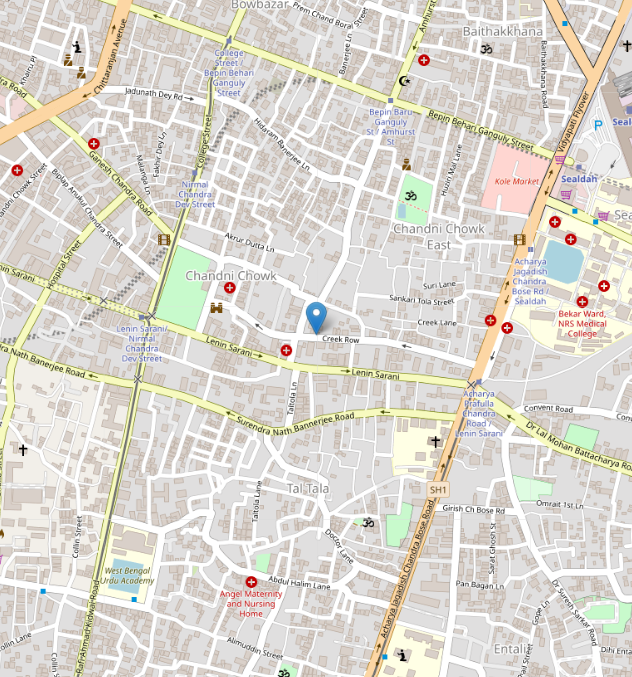

In [41]:
from IPython.display import Image 
Image('image1.png')

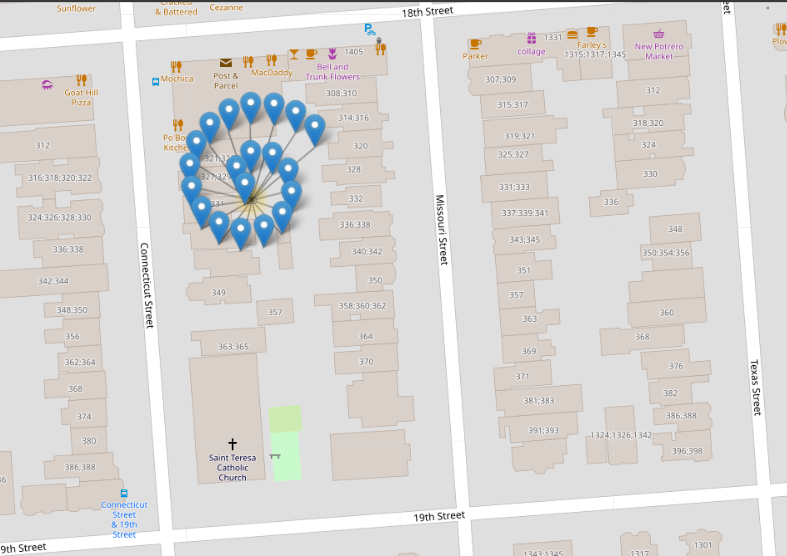

In [42]:
from IPython.display import Image 
Image('image2.png')

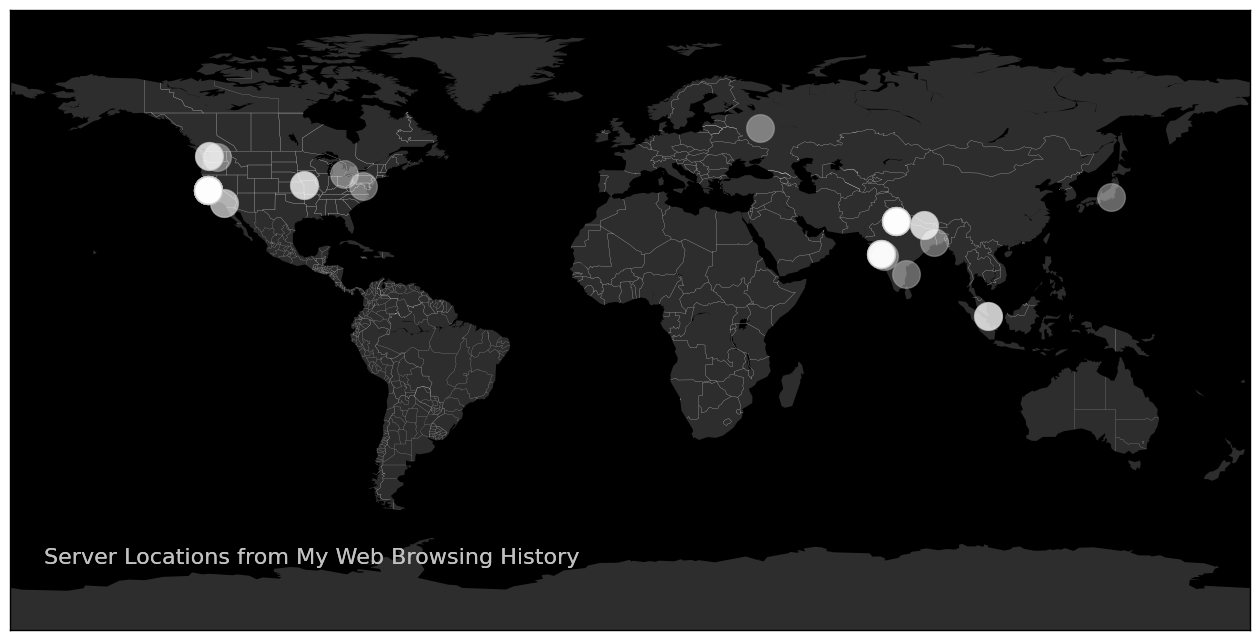

In [43]:
from matplotlib import animation
from mpl_toolkits.basemap import Basemap
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt

# Setup the figure
fig, ax = plt.subplots(figsize=(16, 9))
map = Basemap()

# Style the map
map.drawmapboundary(fill_color='#000000')
map.fillcontinents(color='#2d2d2d', lake_color='#000000')
map.drawcountries(linewidth=0.15, color='w')
map.drawstates(linewidth=0.1, color='w')

# Project coordinates
x, y = map(df['longitude'].values, df['latitude'].values)

# Caption
def init():
    plt.text(-170, -72,
             'Server Locations from My Web Browsing History',
             ha='left', va='bottom', size=16, color='silver')

# Animation frame update
def update(frame):
    return map.plot(x[frame], y[frame], linestyle='none',
                    marker='o', markersize=20, alpha=0.4,
                    c='white', markeredgecolor='silver', markeredgewidth=1)

# Create the animation
ani = animation.FuncAnimation(fig, update, init_func=init,
                              frames=len(df), interval=500, repeat=False)

# Save as GIF
ani.save("animated_map.gif", writer=PillowWriter(fps=2))
